Exploring the Differences Between a Traditional SSP Framework and a Global Warming Levels Approach# 

In this notebook, we will explore the different scientific procedures that go behind two major approaches towards understanding regional global warming today:
1. Traditional global warming approach using SSP's (Shared Socioeconomic Pathways)
    - We will reference this approach as the **Traditional SSP Approach** throughout this notebook.
2. New global warming approach using Warming Levels
    - We will reference this approach as the **New GWL Approach** throughout this notebook.

From this notebook, we will understand:
- The different approaches towards understanding global warming levels
- Statistical findings to back our conclusions using extreme heat days as an example

**Intended Application:** As a user, I want to  **<span style="color:#FF0000">understand the differences between a traditional SSP approach and the new Global Warming Levels framework with respect to extreme event planning.</span>**

**Runtime**: With the default settings, this notebook takes approximately **40 minutes** to run from start to finish. Modifications to selections may increase the runtime.

## Step 0: Setup

Import libraries needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import climakitae as ck
from climakitaegui.explore import warming_levels
from climakitaegui.explore.warming import fit_models_and_plots
from climakitae.explore.threshold_tools import get_exceedance_count
from climakitae.util.utils import get_closest_gridcell, add_dummy_time_to_wl

### Explore and Calculate Data

Now, let's launch a toolkit to view localized projections under varying levels of warming. We are going to pre-select specific selections that will effectively showcase the differences between the Traditional SSP approach and the New GWL approach.

Card(collapsible=False, styles={'header_background': 'lig...}, title='Choose Data t..., width=600)
    [0] Column
        [0] Row
            [0] Column(width=270)
                [0] StaticText(name='Downscaling Method')
                [1] RadioBoxGroup(name='Downscaling method', options=OrderedDict({'Dynamical': ...]), value='Dynamical')
            [1] Column(width=120)
                [0] StaticText(styles={'color': 'red'})
        [1] Row
            [0] Column(width=250)
                [0] StaticText(name='Variable Type')
                [1] Select(options=OrderedDict({'Air Temperat...]), value='Air Temperature at 2m', width=225)
                [2] StaticText(value="Temperature o...)
                [3] StaticText(name='Variable Units')
                [4] RadioBoxGroup(name='Units', options=OrderedDict({'K': 'K', ...]), value='K')
                [5] StaticText(name='Timescale')
                [6] RadioBoxGroup(options=OrderedDict({'daily': 'dai...]), value='monthly')
                [7] StaticText(name='Model Grid-Spacing')
                [8] RadioBoxGroup(name='Resolution', options=OrderedDict({'3 km': '3 km...]), value='45 km')
            [1] Column(width=220)
                [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                [1] Select(name='Subset the data by...', options=OrderedDict({'none': 'none...]), value='states', width=225)
                [2] MultiSelect(name='Location selection', options=OrderedDict({'CA': 'CA', ...]), value=['CA'], width=225)
                [3] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5)
                [4] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5)
        [2] Row
            [0] Column(width=250)
                [0] StaticText(value='Years around G...)
                [1] IntSlider(end=25, start=5, value=15)
            [1] Column(width=220)
                [0] StaticText(value='Return a delta s...)
                [1] RadioBoxGroup(inline=True, options=OrderedDict({'Yes': 'Yes',...]), value='Yes')
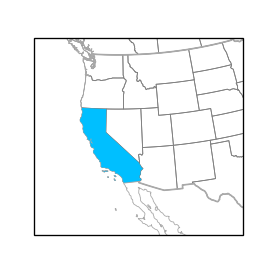

In [2]:
wl = warming_levels()
wl.choose_data()

In [3]:
# Selecting a specific latitude and longitude of interest:
my_lat, my_lon = 32.89, -117.235

# Specifying a range that will result in the nearest gridcell being included:
wl.wl_params.latitude=(32.87, 32.91)
wl.wl_params.longitude=(-117.25, -117.21)

# Setting a few other parameters to extract warming levels:
wl.wl_params.variable="Maximum air temperature at 2m"
wl.wl_params.units="degF"
wl.wl_params.timescale="daily"
wl.wl_params.resolution='3 km'
wl.wl_params.downscaling_method="Statistical"
wl.wl_params.anom="No"

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Depending on the parameters, this calculate step <span style="color:red">**can take up to ~45 min. to complete!**</span>. If you were to select the hybrid-statistically downscaled data on the highest resolution (which is what we have selected above), this will take the longest, as it will deal with the largest amount of data and number of simulations. We are currently developing data optimization techniques to speed this up, but for now, when you run this cell, feel free to leave for a bit and come back in ~45 min. to check on how it's doing.

In [4]:
%%time
wl.calculate()

WARNING
-------
You have retrieved data for more than one SSP, but not all ensemble members for each GCM are available for all SSPs.

As a result, some scenario and simulation combinations may contain NaN values.

If you want to remove these empty simulations, it is recommended to first subset the data object by each individual scenario and then dropping NaN values.


Computing each warming level:   0%|          | 0/8 [00:00<?, ?it/s]


Warming Level data for LOCA2_EC-Earth3_r4i1p1f1 is not completely available, since the warming level slice's center year is towards the end of the century. All other valid data is returned.


Warming Level data for LOCA2_EC-Earth3_r4i1p1f1 is not completely available, since the warming level slice's center year is towards the end of the century. All other valid data is returned.


Warming Level data for LOCA2_EC-Earth3_r4i1p1f1 is not completely available, since the warming level slice's center year is towards the end of the century. All other valid data is returned.


Warming Level data for LOCA2_EC-Earth3-Veg_r3i1p1f1 is not completely available, since the warming level slice's center year is towards the end of the century. All other valid data is returned.


Warming Level data for LOCA2_EC-Earth3-Veg_r5i1p1f1 is not completely available, since the warming level slice's center year is towards the end of the century. All other valid data is returned.


Warming Level data for LOCA2_EC

<span style="color:red">**Disclaimer:**</span> We recognize that some of the following analyses, conclusions, and figures are dependent on the data parameters specified above to an extent. So, you may get different results and figures based on different data parameters you select above, but you should be able to arrive at the same conclusions we arrive at at the end of this notebook.

### (Optional): Visualize the regional response at a series of global warming levels.

This next visualize step is optional, in case you want to go directly to extracting the data. You can use the following drop down menu to visualize a specific global warming level reached for a scenario of interest. Scenarios shown are Shared Socioeconomic Pathways ([SSPs](https://www.sciencedirect.com/science/article/pii/S0959378016300681)): ranging from low (SSP 1-1.9) to high (SSP 5-8.5) emissions trajectories. 

To learn more about the data available on the Analytics Engine, [see our data catalog](https://analytics.cal-adapt.org/data/). 

In [5]:
wl.visualize()

Loading in GWL snapshots...
Your data is already loaded into memory


Column
    [0] Card(collapsible=False, height=600, sizing_mode='fixed', styles={'header_background': 'lig...}, title='When do different s..., width=850)
        [0] Column
            [0] Markdown(str)
            [1] Select(description='Shared Socioeconomic P..., name='Scenario', options=OrderedDict({'All': 'All',...]), value='All', width=250)
            [2] ParamMethod(method, _pane=HoloViews, defer_load=False)
    [1] Card(collapsible=False, height=800, sizing_mode='fixed', styles={'header_background': 'lig...}, title='Regional response a..., width=850)
        [0] Row(width=230)
            [0] StaticText(value='Warming level (°C)')
            [1] RadioButtonGroup(description='Warming level i..., options=OrderedDict({'1.5': 1.5, ...]), value=1.5)
        [1] Tabs(dynamic=True)
            [0] Column
                [0] StaticText(value="Panels show the 30-year a..., width=800)
                [1] ParamMethod(method, _pane=Row, defer_load=False)
            [1] Column
                [0] StaticText(value='Panels show the median, ..., width=800)
                [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

## Step 1: Extract warming level data using the traditional SSP framework

Now, we will extract warming level data using the traditional SSP framework, to examine what that process would look like and what data we can generate.

**For this example, we will select 30-year slices centered around 2040, or the average year that SSP 3-7.0 simulations will reaches 2˚C** above pre-industrial levels, according to the IPCC weighted census projection.

We can begin by going back to our `warming_levels()` object from the beginning, and accessing the original catalog data, via `wl.catalog_data`.

In [6]:
# Accessing our catalog data and selecting on the SSP3-7.0 scenario
time_horizon = wl.catalog_data.sel(scenario="Historical + SSP 3-7.0")

We'll need to extract the gridcell of interest once again:

In [7]:
time_horizon = time_horizon.sel(lat=my_lat,lon=my_lon,method='nearest')

And then, we will extract the time slice for our time of interest.

In [8]:
# Use the original time window from the beginning
ssp_data = time_horizon.sel(time=slice(str(2040-wl.wl_params.window),str(2040+(wl.wl_params.window-1))))

Now, we can load in the data and use a similar process to generate and examine the data needed for the new Global Warming Level framework as well.

In [9]:
# Loading data into memory-- may take up to ~10 min.
ssp_data = ck.load(ssp_data, progress_bar=True)

Processing data to read 2.59 MB of data into memory... 
[########################################] | 100% Completed | 50.21 s
Complete!


## Step 2: Extract warming level data using new GWL method

Let's extract warming level data using the new GWL method. **We will once again extract 30-year slices for each simulation, but now around each of the different warming levels that it reaches above pre-industrial levels.** For example, `ACCESS-CM2` has a simulation `r4i1p1f1` that will reach the following levels of warming at these estimated dates:

| Warming Level | Date |
| :-: | :-: |
| 1.5 | 2023-09-16 |
| 2.0 | 2034-02-15 |
| 3.0 | 2052-02-15 |
| 4.0 | 2066-03-16 |

So, in `wl.sliced_data`, we will be able to access 30-year slices of warming for each of the warming levels that all the simulations reach (not all simulations reach all levels of warming).

We'll first take a closer look at 2˚C warming in `wl.sliced_data`.

In [10]:
two_degrees = wl.sliced_data['2.0']

Let's once again limit ourselves to only the nearest gridcell to our location of interest:

In [11]:
two_degrees = two_degrees.sel(lat=my_lat, lon=my_lon, method='nearest')

Now, let's assign `gwl_data` to `two_degrees` for usage later in our notebook. We don't need to write the warming level data into memory here because it was already read into memory in the first step of this notebook.

In [12]:
gwl_data = two_degrees

## Step 3: Calculate Exceedences of 115˚F using these two approaches

Now, we can examine how these two approaches compare when it comes to calculating the number of future days that exceed 115˚F. Using a function from `threshold_tools`, we'll be able to count number of days exceeding 115˚F warming grouped by year.

### Traditional Approach

In [13]:
threshold_value = 91

In [14]:
# Finding the exceedance count for our data from the SSP approach.
time_period_dist = get_exceedance_count(ssp_data, threshold_value)
n_samples = len(time_period_dist.time) * len(time_period_dist.simulation)
print('Sample size: ' + str(n_samples))

Sample size: 1860


Note this sample size we've printed above-- this will become relevant later.

Now, let's create a visualization to illustrate the number of excessive heating days by year.

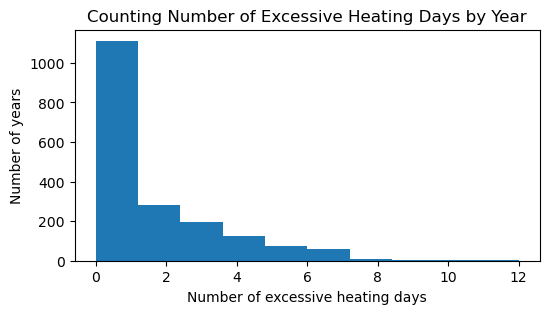

In [15]:
# Plotting distribution of excessive heating by original SSP method
plt.figure(figsize=(6,3))
plt.hist(time_period_dist.values.flatten())
plt.title('Counting Number of Excessive Heating Days by Year')
plt.xlabel('Number of excessive heating days')
plt.ylabel('Number of years');

### New Approach

In [16]:
# Adjusting the time index into dummy time-series for counting
two_degs = add_dummy_time_to_wl(gwl_data)
gwl_dist = get_exceedance_count(two_degs, threshold_value)

In [17]:
n_samples = 30 * len(gwl_dist.all_sims)
print('Sample size: ' + str(n_samples))

Sample size: 3870


Let's take a look at how this distribution breaks down as well.

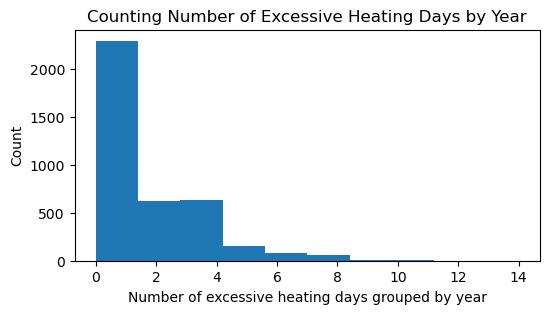

In [18]:
plt.figure(figsize=(6,3))
plt.hist(gwl_dist.values.flatten());
plt.title('Counting Number of Excessive Heating Days by Year')
plt.xlabel('Number of excessive heating days grouped by year')
plt.ylabel('Count');

**One important thing to note:** Notice how in the two graphs (and in the calculated sample sizes) is that the counts of excessive heating days by year is much higher in the new framework than the original SSP framework. Why does this occur?

The new GWL framework will ***include all simulations that reach a specified amount of warming regardless of when they reach that level of warming, rather than the SSP framework, which will preliminarily subset a portion of simulations that follow a given SSP trajectory.*** Because of this change, we are able to include more simulations into our calculations and projections for future climate.

We will examine further on the effects of including more simulations into a given area's future climate projections.

To resume our comparisons, let's overlay the two distributions together to visually compare the two.

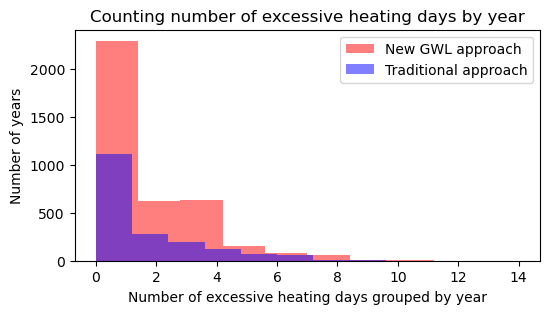

In [19]:
# Plotting the two approaches together
plt.figure(figsize=(6,3))

counts_gwl, bins_gwl = np.histogram(gwl_dist)
plt.hist(bins_gwl[:-1], bins_gwl, weights=counts_gwl, lw=3, fc=(1, 0, 0, 0.5), label='New GWL approach')

counts_trad, bins_trad = np.histogram(time_period_dist)
plt.hist(bins_trad[:-1], bins_trad, weights=counts_trad, lw=3, fc=(0, 0, 1, 0.5), label='Traditional approach')

plt.title('Counting number of excessive heating days by year')
plt.xlabel('Number of excessive heating days grouped by year')
plt.ylabel('Number of years')
plt.legend();

Now, we can clearly see a difference between the two distributions, mainly based on the counts of excessive heating days by year. **But, what is the significance in having such different distributions?**

We will be able to see the shortcomings of using the traditional approach over the new GWL approach through two methods:
1. Examining tail-end events.
    - Viewing log-plots
    - Comparing confidence intervals
2. Examining the shortcomings of trying to bootstrap to mitigate lower sampling of yearly excessive heating days with the traditional approach.

## Step 4: Examining the Significance of Differences Between Distributions

### 4.1. Examining Tail-End Events

First, we will examine a log-plot to compare both distributions' tail-end behavior more clearly.

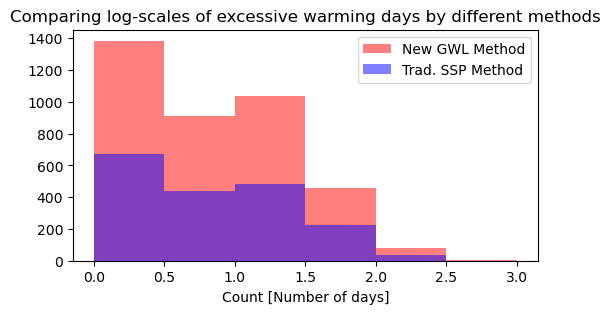

In [20]:
### Log-scaled plot with horizontal shift (log(x+1))
plt.figure(figsize=(6,3))
gwl_dist_log = np.log1p(gwl_dist)
time_period_log = np.log1p(time_period_dist)
gwl_dist_log.plot.hist(lw=3, fc=(1, 0, 0, 0.5), label='New GWL Method', bins=np.linspace(0, gwl_dist_log.max().round().item(), 7))
time_period_log.plot.hist(lw=3, fc=(0, 0, 1, 0.5), label='Trad. SSP Method', bins=np.linspace(0, gwl_dist_log.max().round().item(), 7))

plt.title('Comparing log-scales of excessive warming days by different methods')
plt.legend();

Clearly, we can still see the differences between the log-scaled versions of these two distributions. However, if we continue further and fit `pearson3` models to both of these distributions, we'll be able to quantitative discern the differences between the distributions and their confidence intervals.

#### Fitting `pearson3` distributions to new and traditional methods

In [21]:
# Importing `pearson3` model fitting function and `threshold_tools` to use distribution on our data.
from scipy.stats import pearson3
from climakitae.explore import threshold_tools

To begin, we're going to **remove 0's from both distributions** to examine and fit extreme values more closely.

In [22]:
# Removing 0's to examine extreme values
gwl_dist_vals = gwl_dist.to_numpy().flatten()
gwl_dist_vals = gwl_dist_vals[gwl_dist_vals > 0]

In [23]:
time_period_vals = time_period_dist.to_numpy().flatten()
time_period_vals = time_period_vals[time_period_vals > 0]

Now, we're going to fit the datasets to separate `pearson3` distributions, and overlaying the respective distributions and their datasets.

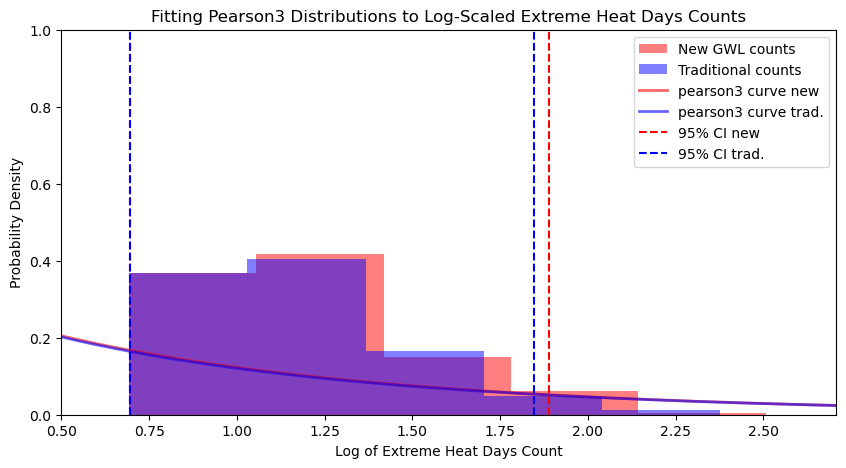

In [24]:
new_params, trad_params = fit_models_and_plots(np.log1p(gwl_dist_vals), np.log1p(time_period_vals), 'pearson3');

We can see that there is significant overlap between the two probability distributions of Extreme Heat Days counts, but it is also clear that there is a difference between the two distributions' confidence intervals. **Because the 95% confidence interval of the Log of Extreme Heat Days is a smaller range using the New GWL method than with the Traditional SSP method, we can also derive more confidence in our ability to predict extreme heat day counts for the future.**

### 4.2. Examining Bootstrapped Approach for Traditional Method

Another way of approaching the issue of having less simulations using the traditional method vs. the new method is to bootstrap from the simulations generated by the traditional method to match the number of simulations used for the new method. What we will demonstrate is that because of these **tail-end events, this method of bootstrapping will do more harm than good in predicting extreme heating events**.

We will begin by conducting one basic bootstrap of the traditional SSP data and examining how that distributions compares with the new GWL framework distribution.

In [25]:
# Showing one bootstrapped distribution
flat_new = gwl_dist_vals.flatten()
r = np.random.RandomState(100)
bootstrapped = r.choice(time_period_vals.flatten(), size=len(flat_new), replace=True)

# Show percentage of sampling a distribution with excessive heating days
heat_wave_days = 10
bootstrap_prob = len(bootstrapped[bootstrapped > heat_wave_days]) / len(bootstrapped)
new_prob = len(flat_new[flat_new > heat_wave_days]) / len(flat_new)
# bootstrap_prob = np.percentile(bootstrapped, 95)
# orig_prob = np.percentile(gwl_dist_vals.flatten(), 95)

print("Bootstrapped probability of a future year with > 10 excessive heating days:", bootstrap_prob)
print("Warming Level probability of a future year with > 10 excessive heating days:", new_prob)

Bootstrapped probability of a future year with > 10 excessive heating days: 0.00040241448692152917
Warming Level probability of a future year with > 10 excessive heating days: 0.002012072434607646


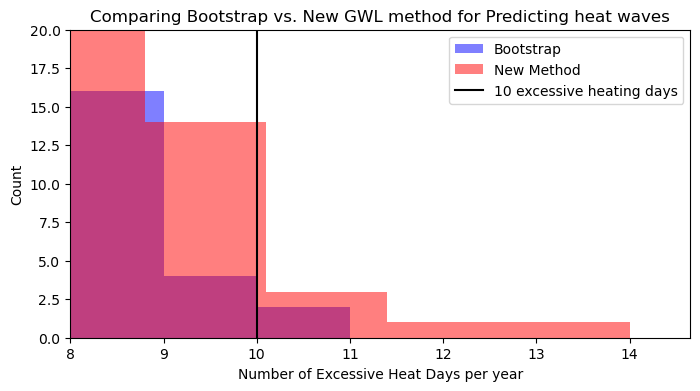

In [26]:
# Creating figure to show results
plt.figure(figsize=(8,4))
plt.hist(bootstrapped, lw=3, fc=(0, 0, 1, 0.5), label='Bootstrap')
plt.hist(gwl_dist_vals, lw=3, fc=(1, 0, 0, 0.5), label='New Method')
plt.title('Comparing Bootstrap vs. New GWL method for Predicting heat waves')
plt.axvline(x=10, c='black', label='10 excessive heating days')
plt.xlim(left=8)
plt.ylim(top=20)
plt.xlabel('Number of Excessive Heat Days per year')
plt.ylabel('Count')
plt.legend()
plt.savefig('compare_bootstrap.png')
plt.show();

Now, let's run 10,000 bootstraps to examine the shortcomings of bootstrapping over a larger sample.

In [27]:
# Now, we run bootstrap n=10000 times and calculate how many sampled distributions encapsulated extreme cases of heating > a given number of days.

## Include 0 counts of heating days in the bootstrap
heat_wave_days=10
num_bootstraps=10000
probs = []
for _ in range(num_bootstraps):
    bootstrapped = np.random.choice(time_period_dist.to_numpy().flatten(), size=len(gwl_dist.to_numpy().flatten()), replace=True)
    prob_of_heat_wave = len(bootstrapped[bootstrapped > heat_wave_days]) / len(bootstrapped)
    probs.append(prob_of_heat_wave)

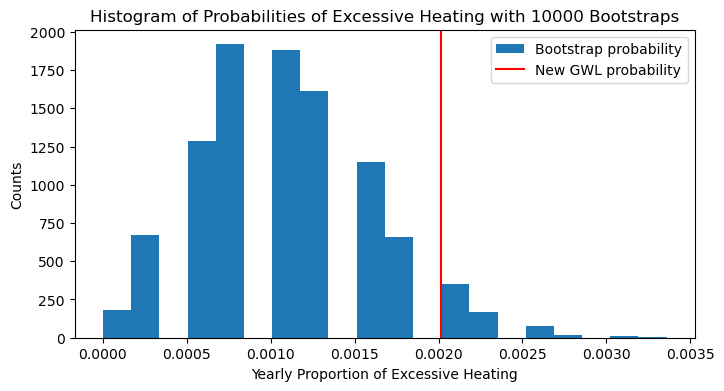

In [28]:
# Creating histogram figure for bootstraps
plt.figure(figsize=(8,4))
plt.hist(probs, label='Bootstrap probability', bins=20)
plt.axvline(x=new_prob, c='r', label='New GWL probability')
plt.title('Histogram of Probabilities of Excessive Heating with {} Bootstraps'.format(num_bootstraps))
plt.legend()
plt.xlabel('Yearly Proportion of Excessive Heating')
plt.ylabel('Counts')
plt.savefig('bootstrap_fig.png')
plt.show();

From the figure, we can clearly see that the predicting the proportion of having a year with excessive heating with the new GWL framework is significantly higher than the proportion predicted using the bootstrapped framework. To examine how unlikely it is to have a bootstrapped year with a higher proportion of yearly excessive heating than the proportion calculated using the new GWL framework, we can fit a normal distribution to the bootstrapped distribution and see the likelihood of having values above the red line visualized above.

In [29]:
# Fitting data to a normal distribution and seeing the significance of the new GWL framework proportion
from scipy.stats import norm

mu, std = norm.fit(probs)
prob_of_occur = 1 - norm.cdf(new_prob, loc=mu, scale=std)
print("Probability of having a year with a proportion of excessive heating days greater than what is calculated by the new GWL framework:", '{:.20f}'.format(prob_of_occur))

Probability of having a year with a proportion of excessive heating days greater than what is calculated by the new GWL framework: 0.03935949299564867054


Clearly, the probability of finding years with higher excessive heating counts will be much lower in the bootstrapped distribution than the heating probability that the new GWL framework will present.

This is a result of how bootstrapping does not sample extreme events well. By including more simulations with the new GWL framework, we are able to examine more simulations that cover greater amounts of extreme events, like excessive heating, in order to more accurately predict the likelihood of extreme weather events in the future. Because bootstrapping cannot sample from a distribution is does not include, **this bootstrapped approach on the simulations used from the SSP framework will result in an underconsideration of potential excessive heating (and other extreme events) in the future.**

## Conclusion

We can see that the new method of measuring GWLs is clearly more effective due to the tail-end events of extreme events occurring, through the usage of tail-end probabilities, confidence intervals, and bootstrapped probabilities. This is mainly due to the increased number of simulations that can be included using the New GWL framework over the Traditional SSP framework. As our global climate continues to heat, the likelihood of extreme events will continue to increase. **So, with the addition of more models and their respective simulations, we are able to more confidently understand measure the likelihood and severity of extreme events that a Traditional SSP framework may miss out on.**